In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Bias_correction_ucl.csv')

In [3]:
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [9]:
data.shape

(7752, 18)

In [4]:
correlations_data = data.corr()['Next_Tmax'].sort_values()
print(correlations_data.head(28))

LDAPS_CC3          -0.520706
LDAPS_CC2          -0.496251
LDAPS_CC1          -0.457583
LDAPS_CC4          -0.451324
LDAPS_RHmin        -0.442958
LDAPS_WS           -0.346592
LDAPS_RHmax        -0.286478
LDAPS_PPT3         -0.196845
LDAPS_PPT4         -0.180669
LDAPS_PPT2         -0.180449
DEM                -0.172674
LDAPS_PPT1         -0.120079
Slope              -0.102838
lat                -0.053567
lon                 0.003060
Solar radiation     0.008809
station             0.108306
LDAPS_LH            0.159324
Present_Tmin        0.473868
LDAPS_Tmin_lapse    0.593195
Present_Tmax        0.613109
Next_Tmin           0.621427
LDAPS_Tmax_lapse    0.836144
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64


In [5]:
correlations_data = data.corr()['Next_Tmin'].sort_values()
print(correlations_data.head(28))

DEM                -0.247100
Slope              -0.147043
LDAPS_PPT4         -0.104515
LDAPS_WS           -0.097390
LDAPS_CC4          -0.085805
lat                -0.083621
LDAPS_RHmax        -0.072490
LDAPS_PPT3         -0.063318
LDAPS_LH           -0.055895
LDAPS_CC3          -0.055217
lon                -0.046737
LDAPS_CC1          -0.011129
LDAPS_PPT2         -0.008131
LDAPS_PPT1          0.021486
LDAPS_CC2           0.031500
LDAPS_RHmin         0.095830
Solar radiation     0.120400
station             0.128719
LDAPS_Tmax_lapse    0.591535
Next_Tmax           0.621427
Present_Tmax        0.625252
Present_Tmin        0.799758
LDAPS_Tmin_lapse    0.886964
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64


In [27]:
data=data.drop(labels=['Date','lon','lat','station','LDAPS_Tmin_lapse','LDAPS_Tmax_lapse','Present_Tmin','DEM','Slope','LDAPS_PPT4'],axis=1)

ValueError: labels ['Date' 'lon' 'lat' 'station' 'LDAPS_Tmin_lapse' 'LDAPS_Tmax_lapse'
 'Present_Tmin' 'DEM' 'Slope'] not contained in axis

## Missing values

In [8]:
data.head(20)

,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,58.255688,91.116364,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,31.9,52.263397,90.604721,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,31.6,48.690479,83.973587,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9
3,32.0,58.239788,96.483688,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,45.7160,2.5348,5856.964844,31.7,24.3
4,31.4,56.174095,90.155128,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,35.0380,0.5055,5859.552246,31.2,22.5
5,31.9,52.437126,85.307251,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,0.0,0.0,0.0,54.6384,0.1457,5873.780762,31.5,24.0
6,31.4,56.287189,81.019760,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,0.0,0.0,0.0,0.0,12.3700,0.0985,5849.233398,30.9,23.4
7,32.1,52.326218,78.004539,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,0.0,0.0,0.0,0.0,52.5180,1.5629,5863.992188,31.1,22.9
8,31.4,55.338791,80.784607,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,0.0,0.0,0.0,0.0,50.9312,0.4125,5876.901367,31.3,21.6
9,31.6,56.651203,86.849632,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,0.0,0.0,0.0,0.0,208.5070,5.1782,5893.608398,30.5,21.0


In [26]:
check_missing_val=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in check_missing_val:
    print(feature,np.round(data[feature].isnull().mean(),4),'% missing values')

LDAPS_PPT4 0.0097 % missing values


In [24]:
X=data.iloc[:,:-2].values
y=data.iloc[:,-2:].values

In [25]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:,:-2])
X[:,:-2]=imputer.transform(X[:,:-2])

In [15]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(y[:,-2:])
y[:,-2:]=imputer.transform(y[:,-2:])

In [46]:
plt.scatter(X['LDAPS_CC4'],y['Next_Tmax'],color='red')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [13]:
X

array([[2.87000000e+01, 5.82556877e+01, 9.11163635e+01, ...,
        2.12335000e+02, 2.78500000e+00, 5.99289600e+03],
       [3.19000000e+01, 5.22633972e+01, 9.06047211e+01, ...,
        4.47624000e+01, 5.14100000e-01, 5.86931250e+03],
       [3.16000000e+01, 4.86904793e+01, 8.39735870e+01, ...,
        3.33068000e+01, 2.66100000e-01, 5.86355566e+03],
       ...,
       [2.32000000e+01, 2.29330139e+01, 7.72437439e+01, ...,
        1.95844000e+01, 2.71300000e-01, 4.45134522e+03],
       [2.00000000e+01, 1.97946663e+01, 5.89362831e+01, ...,
        1.23700000e+01, 9.84746000e-02, 4.32952051e+03],
       [3.76000000e+01, 9.85247345e+01, 1.00000153e+02, ...,
        2.12335000e+02, 5.17823000e+00, 5.99289600e+03]])

In [14]:
y

array([[29.1, 21.2],
       [30.5, 22.5],
       [31.1, 23.9],
       ...,
       [27.8, 17.4],
       [17.4, 11.3],
       [38.9, 29.8]])

In [16]:
data.head(20)

,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,58.255688,91.116364,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,5992.895996,29.1,21.2
1,31.9,52.263397,90.604721,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,5869.312500,30.5,22.5
2,31.6,48.690479,83.973587,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,5863.555664,31.1,23.9
3,32.0,58.239788,96.483688,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,5856.964844,31.7,24.3
4,31.4,56.174095,90.155128,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,5859.552246,31.2,22.5
5,31.9,52.437126,85.307251,6.182295,50.231389,0.185279,0.280818,0.232841,0.146363,0.0,0.0,0.0,0.0,5873.780762,31.5,24.0
6,31.4,56.287189,81.019760,5.587135,125.110007,0.389600,0.333570,0.270419,0.145705,0.0,0.0,0.0,0.0,5849.233398,30.9,23.4
7,32.1,52.326218,78.004539,6.104417,42.011547,0.357856,0.344928,0.272387,0.143841,0.0,0.0,0.0,0.0,5863.992188,31.1,22.9
8,31.4,55.338791,80.784607,6.017135,85.110971,0.408766,0.344800,0.264980,0.148911,0.0,0.0,0.0,0.0,5876.901367,31.3,21.6
9,31.6,56.651203,86.849632,6.518841,63.006075,0.348292,0.306255,0.245254,0.135443,0.0,0.0,0.0,0.0,5893.608398,30.5,21.0


In [20]:
data.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618760,-0.204571,-0.301787,0.570129,0.623496,-0.121820,0.135463,-0.311805,-0.213791,...,-0.140729,-0.109006,-0.099449,-0.120367,-0.099607,-0.187121,-0.105809,-0.025439,0.610348,0.622741
Present_Tmin,0.618760,1.000000,0.123143,-0.015140,0.464151,0.762993,-0.034675,-0.009258,0.084447,0.090263,...,-0.044335,0.112845,0.068176,-0.046126,-0.062965,-0.250275,-0.146339,0.053578,0.471806,0.796670
LDAPS_RHmin,-0.204571,0.123143,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,0.745443,...,0.514075,0.262665,0.390967,0.240642,0.168595,0.102115,0.123744,0.244080,-0.437898,0.095019
LDAPS_RHmax,-0.301787,-0.015140,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,0.391330,...,0.130619,0.268449,0.229050,0.134607,0.117853,0.177168,0.219599,0.149261,-0.283738,-0.071997
LDAPS_Tmax_lapse,0.570129,0.464151,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,-0.523619,...,-0.429539,-0.111065,-0.242122,-0.188115,-0.160273,-0.178895,-0.162332,0.047971,0.827189,0.586868
LDAPS_Tmin_lapse,0.623496,0.762993,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,0.047727,...,-0.080335,0.038056,0.000870,-0.088575,-0.094655,-0.195455,-0.185849,0.159975,0.586983,0.880176
LDAPS_WS,-0.121820,-0.034675,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,0.261090,...,0.220533,0.152587,0.191886,0.161684,0.144085,0.191053,0.171629,0.121759,-0.342729,-0.096576
LDAPS_LH,0.135463,-0.009258,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,-0.264280,...,-0.172766,-0.012542,-0.077545,0.016102,0.019979,0.055133,0.086781,-0.047384,0.157616,-0.055440
LDAPS_CC1,-0.311805,0.084447,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,0.779683,...,0.361046,0.446328,0.389453,0.168742,0.091722,-0.014090,-0.020752,0.218309,-0.452541,-0.011028
LDAPS_CC2,-0.213791,0.090263,0.745443,0.391330,-0.523619,0.047727,0.261090,-0.264280,0.779683,1.000000,...,0.527708,0.305975,0.478472,0.240134,0.159548,-0.012823,-0.018073,0.170403,-0.490756,0.031250


# Data visualization

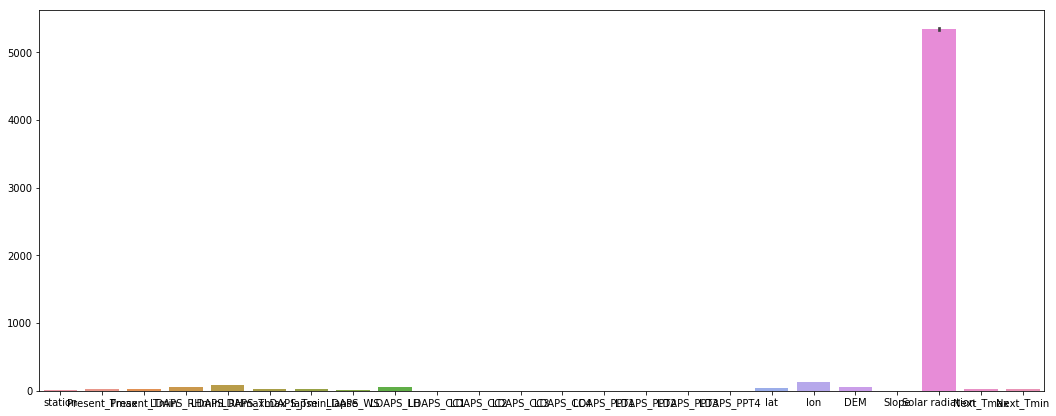

In [28]:
plt.figure(figsize=(18,7))
sns.barplot(data=data)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# feature scaling

In [1]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

NameError: name 'X_train' is not defined

In [20]:
X_train

array([[-1.11406174,  2.15938163,  1.59619065, ..., -0.24023126,
        -0.20949929,  1.18549563],
       [ 1.20002611, -0.73949593, -1.49626219, ...,  0.0064478 ,
        -0.09630006, -0.04793506],
       [ 0.68956556,  1.14297934,  0.56167669, ..., -0.24023126,
        -0.22735039,  0.89215355],
       ...,
       [ 0.65553485,  1.13405674,  0.48636519, ..., -0.24023126,
        -0.22735039, -0.03531904],
       [-0.70569329,  0.09440555,  0.7073267 , ..., -0.24023126,
        -0.22735039,  1.0521458 ],
       [ 1.16599541, -0.68042374, -2.92447884, ..., -0.24023126,
        -0.22735039,  0.65105703]])

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y_train=sc.fit_transform(y_train)
y_test=sc.transform(y_test)

# Training ML Algorithm on train set

In [22]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [15]:
y_pred=regressor.predict(X_test)
print(y_pred)

[[27.10523088 23.86357173]
 [32.16232567 25.59111049]
 [32.53756303 24.77657986]
 ...
 [28.21262972 21.53869815]
 [32.4182196  24.23998819]
 [29.59730727 24.07132145]]


In [18]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 1.42
Mean squared error = 3.37
Median absolute error = 1.18
Explain variance score = 0.56
R2 score = 0.56
